In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import secrets

In [2]:
df_tabular = pd.read_csv("data/tabular_data.csv")
df_hashed = pd.read_csv("data/hashed_feature.csv")
df_train_target = pd.read_csv("data/train.csv")
df_test_target = pd.read_csv("data/test.csv")

# Exploratory Data Analysis

### tabular_data.csv

In [3]:
df_tabular.shape

(61272, 52)

In [4]:
df_tabular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61272 entries, 0 to 61271
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          61272 non-null  int64  
 1   period      61272 non-null  int64  
 2   feature_0   58460 non-null  float64
 3   feature_1   58380 non-null  float64
 4   feature_2   57795 non-null  float64
 5   feature_3   58314 non-null  float64
 6   feature_4   58425 non-null  float64
 7   feature_5   58257 non-null  float64
 8   feature_6   57814 non-null  float64
 9   feature_7   58280 non-null  float64
 10  feature_8   58338 non-null  float64
 11  feature_9   58344 non-null  float64
 12  feature_10  58318 non-null  float64
 13  feature_11  58184 non-null  float64
 14  feature_12  57847 non-null  float64
 15  feature_13  57938 non-null  float64
 16  feature_14  58366 non-null  float64
 17  feature_15  58410 non-null  float64
 18  feature_16  58193 non-null  float64
 19  feature_17  61272 non-nul

In [5]:
df_tabular.feature_25

0        f9ae10397ed62e79c644d06842bbcd92963a5927
1        f9ae10397ed62e79c644d06842bbcd92963a5927
2        f9ae10397ed62e79c644d06842bbcd92963a5927
3        f9ae10397ed62e79c644d06842bbcd92963a5927
4        11e623a37e87cf7995c466723ec99688d55cae8c
                           ...                   
61267    b204e1e3743cc314841070435211e25f4602b9fd
61268    b204e1e3743cc314841070435211e25f4602b9fd
61269    b204e1e3743cc314841070435211e25f4602b9fd
61270    b204e1e3743cc314841070435211e25f4602b9fd
61271    b204e1e3743cc314841070435211e25f4602b9fd
Name: feature_25, Length: 61272, dtype: object

In [6]:
df_tabular.feature_25.isnull().values.any()

False

`feature_25` does not have missing values. And we can convert to number

In [7]:
feature_25_unique = set(df_tabular.loc[:,'feature_25'])
feature_25_unique

{'11e623a37e87cf7995c466723ec99688d55cae8c',
 '390c481a740bb1c12c57f33dc5263ced2ab11796',
 'aa2c96dacf00c451ef465f6115a45a20bccf1256',
 'b204e1e3743cc314841070435211e25f4602b9fd',
 'cf3cca1da7361bd988642600e76c4a3021be8ccf',
 'cf7413906c99be47067cb3fb6299959857710d77',
 'd458ece2abeae803254c5d442b2e2a80f58a4153',
 'f9ae10397ed62e79c644d06842bbcd92963a5927'}

In [8]:
category_feature_25 = dict([(i, j) for i, j in zip(feature_25_unique, range(1,len(feature_25_unique) + 1))])
df_tabular.feature_25 = df_tabular.feature_25.map(category_feature_25)
category_feature_25

{'390c481a740bb1c12c57f33dc5263ced2ab11796': 1,
 '11e623a37e87cf7995c466723ec99688d55cae8c': 2,
 'cf3cca1da7361bd988642600e76c4a3021be8ccf': 3,
 'b204e1e3743cc314841070435211e25f4602b9fd': 4,
 'cf7413906c99be47067cb3fb6299959857710d77': 5,
 'aa2c96dacf00c451ef465f6115a45a20bccf1256': 6,
 'f9ae10397ed62e79c644d06842bbcd92963a5927': 7,
 'd458ece2abeae803254c5d442b2e2a80f58a4153': 8}

heatmap with missing values

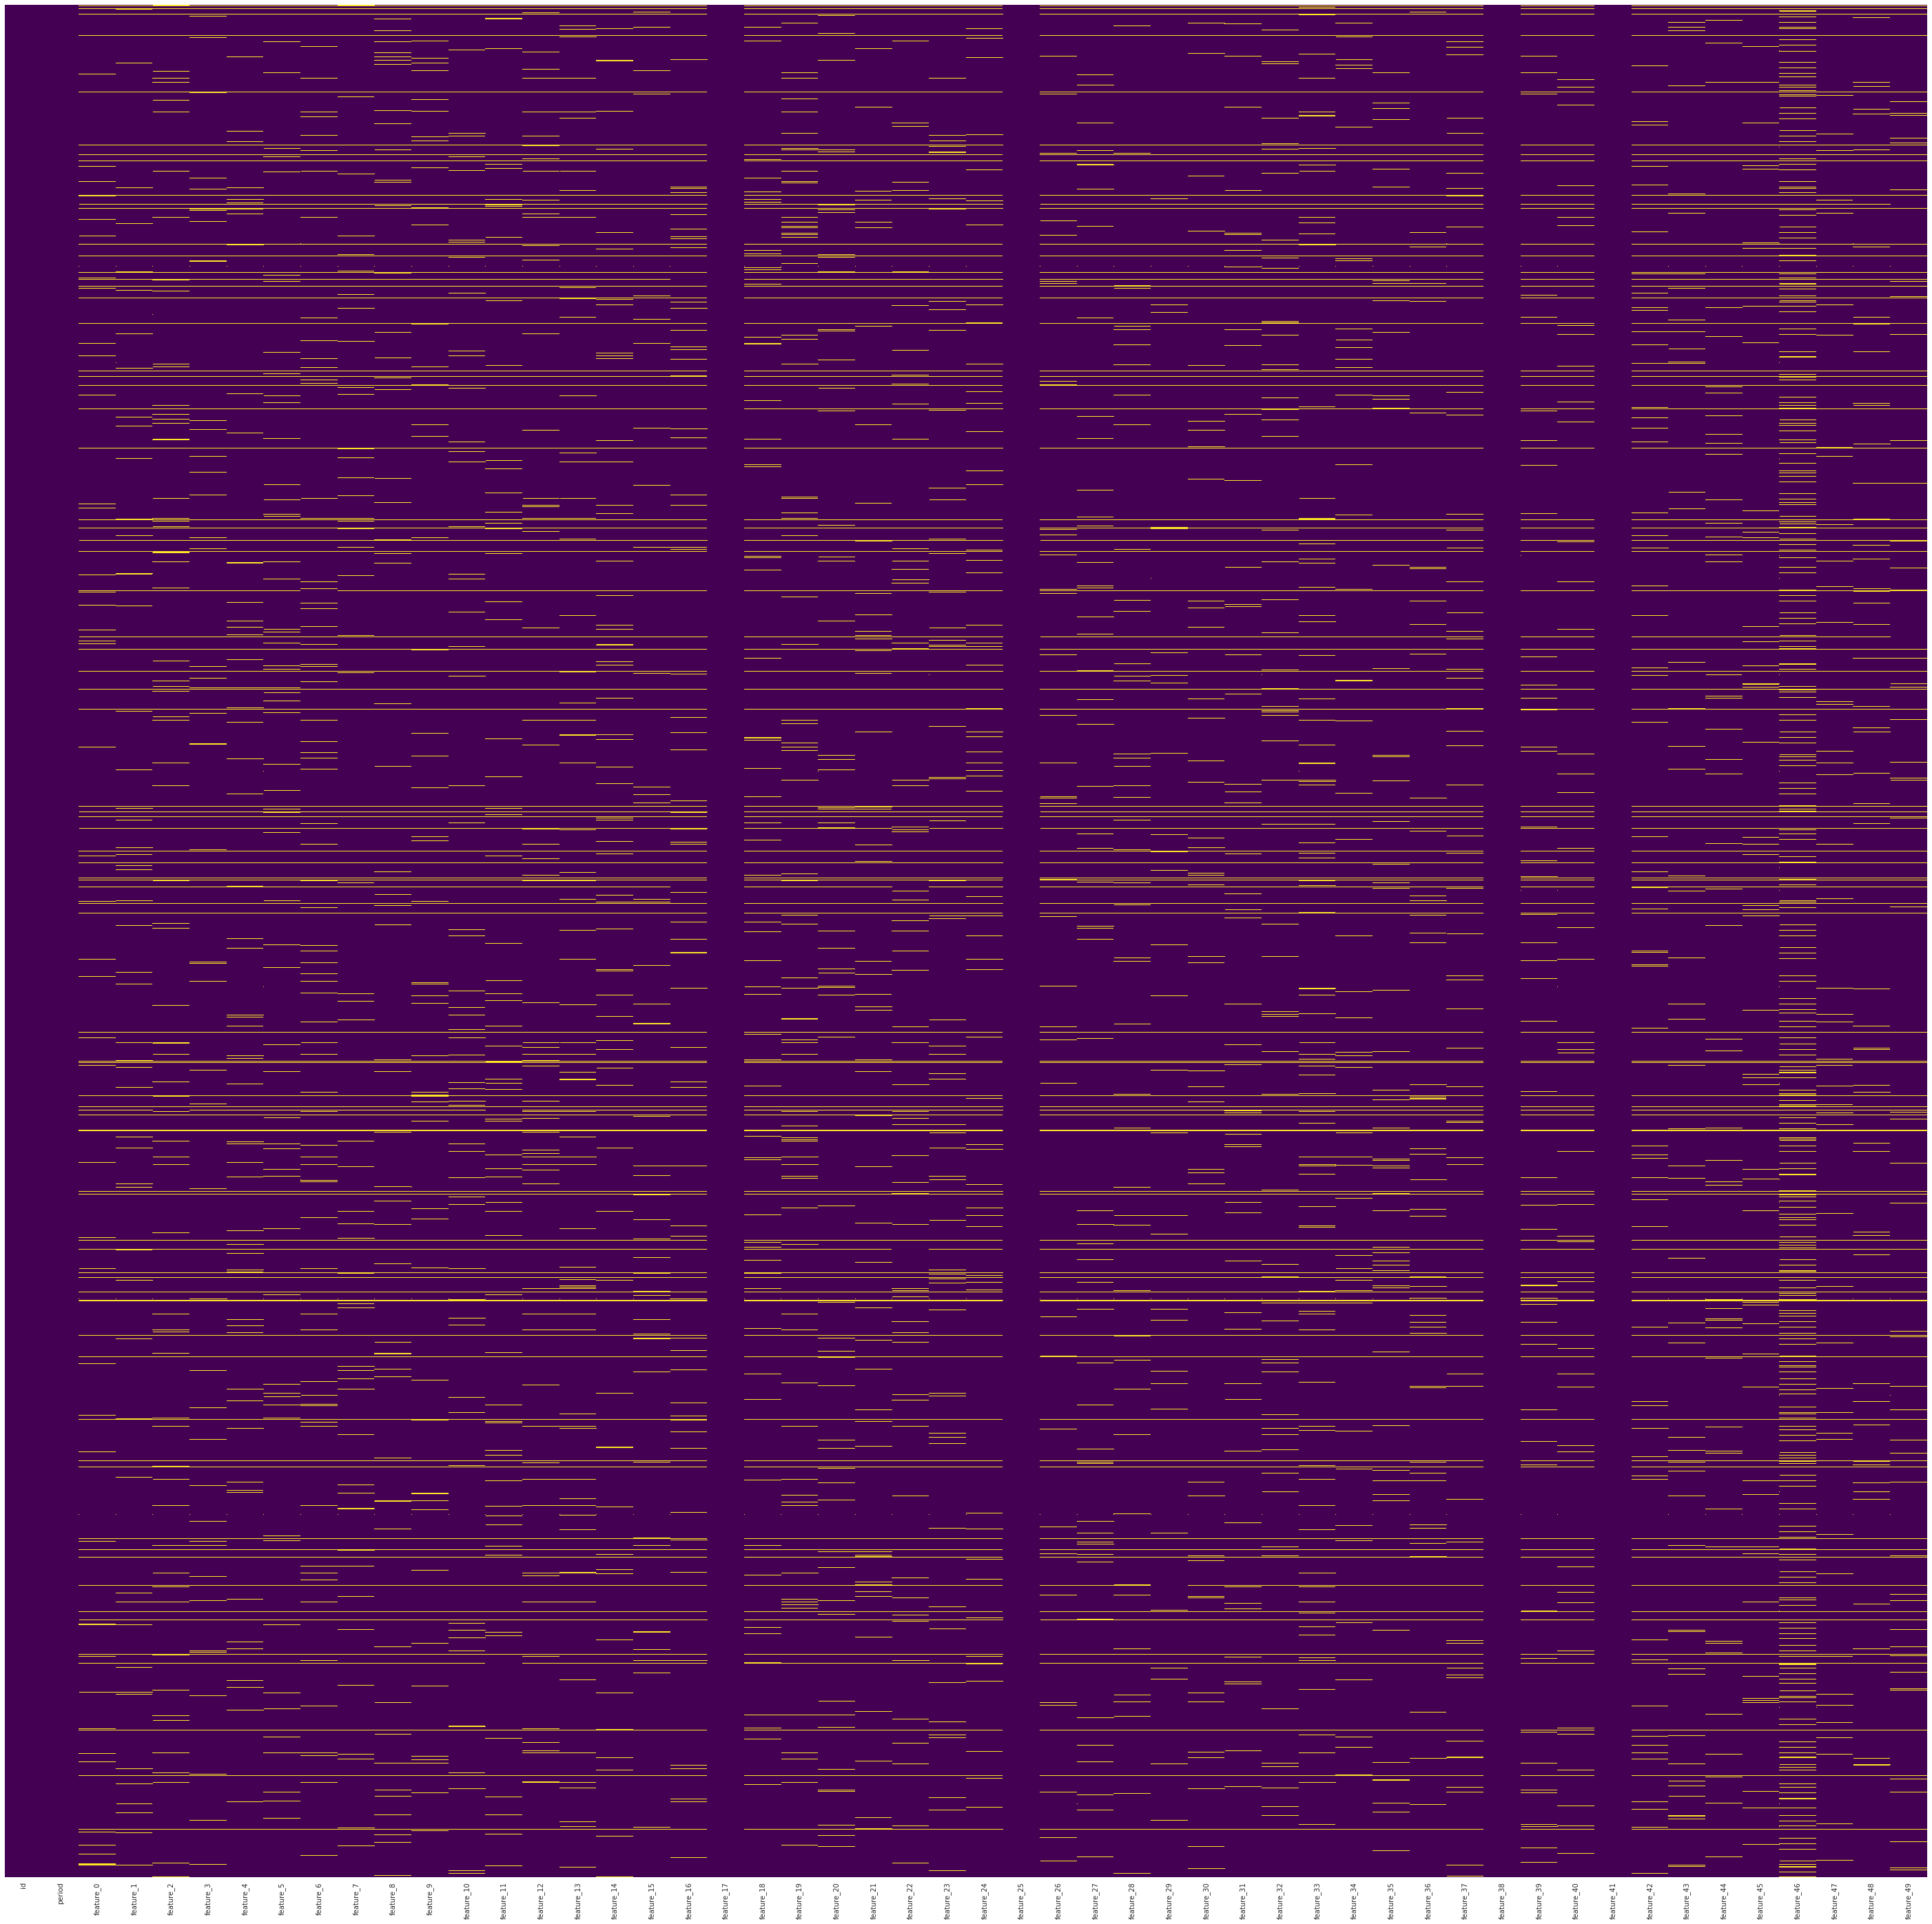

In [9]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(50, 50))
    ax = sns.heatmap(df_tabular.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
#     plt.savefig('mising_data.jpg')

In [10]:
df_tabular.feature_25

0        7
1        7
2        7
3        7
4        2
        ..
61267    4
61268    4
61269    4
61270    4
61271    4
Name: feature_25, Length: 61272, dtype: int64

In [11]:
df_tabular.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0


In [12]:
df_tabular.describe().loc[:, 'id':'feature_17']

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
count,61272.000000,61272.000000,58460.000000,58380.000000,57795.000000,58314.000000,58425.000000,58257.000000,57814.000000,58280.000000,58338.000000,58344.000000,58318.000000,58184.000000,57847.000000,57938.000000,58366.000000,58410.000000,58193.000000,61272.000000
mean,2552.500000,6.500000,110.070493,87.142409,0.305150,3003.454276,414.703826,1466.527398,0.576053,391.127914,125.101255,114.737443,388.728984,1009.457709,0.287931,0.050513,3.155639,10.821589,363.889708,0.499903
std,1473.987237,3.452081,0.465371,95.507541,0.746314,11218.392268,524.216185,7356.174585,0.738444,436.314898,145.203774,661.855299,512.211932,6182.586735,0.111642,0.087219,24.529224,14.111705,2406.061731,0.289287
min,0.000000,1.000000,110.000000,-4.250000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,-1755.000000,0.000000,0.000000,-1857.710000,0.000000,-1.000000,0.000000,-31.000000,0.000000,0.000001
25%,1276.000000,3.750000,110.000000,45.000000,0.059522,0.000000,70.320000,0.000000,0.247418,99.295000,39.000000,0.000000,54.740000,35.000000,0.207877,0.005089,0.000000,0.000000,0.000000,0.247295
50%,2552.500000,6.500000,110.000000,75.000000,0.147504,10.898701,254.950000,0.000000,0.492813,262.430000,100.000000,3.450000,226.960000,70.500000,0.292973,0.021653,0.000000,2.000000,0.000000,0.498526
75%,3829.000000,9.250000,110.000000,114.000000,0.321111,1809.999746,566.530000,0.000000,0.698059,535.162500,184.000000,23.300000,529.122500,110.850000,0.364436,0.066905,1.000000,27.000000,1.000000,0.752020
max,5105.000000,12.000000,119.000000,7989.000000,5.474424,557998.502178,10335.280000,334448.528357,5.499928,7950.650000,1762.000000,4954.493685,10302.850000,43938.825831,0.799732,1.000000,2228.000000,31.000000,17231.157402,0.999965


In [13]:
df_tabular.describe().loc[:, 'feature_18':'feature_37']

,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37
count,58212.000000,57708.000000,58331.000000,58463.000000,58399.000000,58173.000000,58321.000000,61272.000000,58604.000000,58373.000000,58274.000000,58810.000000,58457.000000,58354.000000,58270.000000,57494.000000,58387.000000,58255.000000,58445.000000,58409.000000
mean,417.464495,0.227281,70.269164,11.901861,958.070795,27.880013,3.099158,5.803271,100.387823,4.873682,20.632075,1851.145168,131.571121,2958.747901,133.563480,0.231423,86.755117,1478.685268,100.235933,4.941925
std,445.821333,0.111598,60.744476,54.744476,5974.881448,37.923651,24.016987,1.751409,119.450853,12.779626,45.393407,11954.561123,149.997946,1723.916883,174.027542,0.161397,70.676962,8254.261078,147.057407,25.539829
min,0.000000,0.000000,0.000000,-4.250000,-4.250000,-300.000000,0.000000,1.000000,0.000000,0.000000,-464.620000,0.000000,0.000000,0.000000,-2362.000000,0.000000,-227.000000,0.000000,0.000000,0.000000
25%,117.420000,0.134781,35.000000,0.000000,45.000000,4.000000,0.000000,4.000000,23.000000,0.000000,0.220000,0.000000,31.000000,1587.000000,29.000000,0.082152,43.000000,0.000000,9.050000,0.000000
50%,290.350000,0.223581,62.000000,0.940000,75.000000,19.000000,0.000000,7.000000,69.000000,0.000000,5.600000,66.000000,92.000000,2489.000000,99.000000,0.213396,79.000000,0.000000,50.480000,0.000000
75%,570.907500,0.317355,95.000000,8.400000,116.005000,42.000000,1.000000,7.000000,139.000000,3.420000,24.170000,110.000000,183.000000,4610.000000,199.000000,0.359638,149.000000,476.675311,133.150000,0.000000
max,7951.030000,0.700195,1189.000000,6900.000000,43936.064713,902.000000,1580.000000,8.000000,4419.000000,263.370000,1163.050000,86423.542768,4708.000000,7143.000000,4723.000000,0.897573,234.000000,565227.325781,3824.070000,900.000000


In [14]:
df_tabular.describe().loc[:, 'feature_38':]

,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,61272.000000,58415.000000,58402.000000,61272.0,58389.000000,58218.000000,58428.000000,58307.000000,53036.000000,58418.000000,58368.000000,58397.000000
mean,0.024942,2.864665,2.389240,0.0,451.453999,1.092617,70.045547,12.617404,0.420170,125.407494,288.885904,62.298690
std,0.126317,28.304415,12.291543,0.0,2784.078472,2.989411,60.523556,22.794809,0.402705,123.970687,380.992122,341.761943
min,0.000000,0.000000,-234.610000,0.0,-71832.185113,0.000000,0.000000,0.000000,-0.999903,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,35.000000,1.000000,0.084032,39.000000,38.845000,0.000000
50%,0.000000,0.000000,0.150000,0.0,0.000000,0.000000,61.580000,5.000000,0.412981,94.000000,168.250000,3.000000
75%,0.000000,0.000000,1.630000,0.0,17.765874,1.000000,95.000000,14.000000,0.791630,173.000000,393.807500,13.000000
max,0.999977,2162.720000,1063.930000,0.0,150799.228494,31.000000,1189.000000,504.000000,0.999941,1724.000000,8201.170000,2452.540251


In [15]:
# 12 equal periods
df_tabular['period'].value_counts()

12    5106
11    5106
10    5106
9     5106
8     5106
7     5106
6     5106
5     5106
4     5106
3     5106
2     5106
1     5106
Name: period, dtype: int64

## Train and Test sets IDs

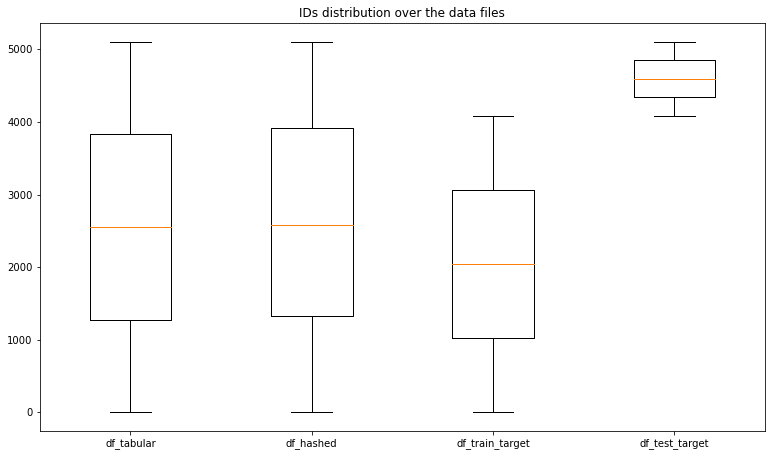

In [16]:
plt.figure(figsize=[13,7.5])
plt.boxplot([df_tabular['id'], df_hashed['id'], df_train_target['id'], df_test_target['id']],
           labels=['df_tabular', 'df_hashed', 'df_train_target', 'df_test_target'])
plt.title('IDs distribution over the data files')
plt.show()

In [17]:
print(f"Train IDs \t from {df_train_target['id'].min()}:{df_train_target['id'].max()}")
print(f"Test IDs \t from {df_test_target['id'].min()}:{df_test_target['id'].max()}")

Train IDs 	 from 0:4083
Test IDs 	 from 4084:5105


### hashed_feature.csv

In [18]:
df_hashed.shape

(266053, 2)

In [19]:
df_hashed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266053 entries, 0 to 266052
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          266053 non-null  int64 
 1   feature_50  265649 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.1+ MB


In [20]:
df_hashed['id'].value_counts()

4517    1278
3503     957
3329     925
4967     774
1885     756
        ... 
3208       1
2145       1
3679       1
3601       1
2226       1
Name: id, Length: 5106, dtype: int64

In [21]:
hlen = []
indexes = []
for i in range(df_hashed['id'].shape[0]):
    hlen.append(df_hashed[df_hashed['id'] == i].shape[0])
    indexes.append(i)

print(f'(min, max): {min(hlen), max(hlen)}')

(min, max): (0, 1278)


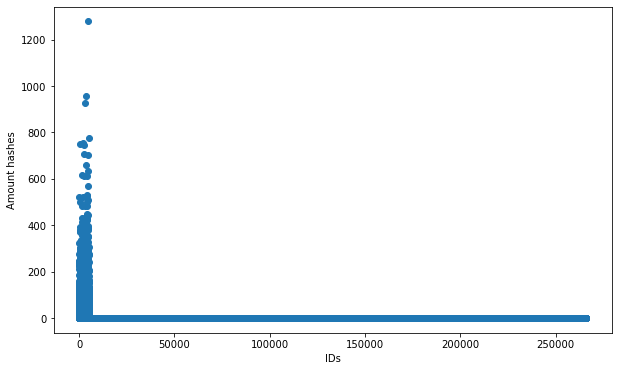

In [22]:
plt.figure(figsize=(10,6));
plt.scatter(x = indexes , y = hlen);
plt.xlabel('IDs');
plt.ylabel('Amount hashes');
plt.show();

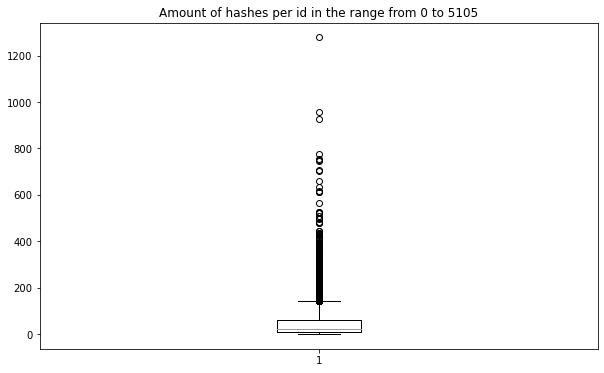

In [23]:
plt.figure(figsize=(10,6));
plt.boxplot(hlen[:5105]);
plt.title('Amount of hashes per id in the range from 0 to 5105');
plt.show();

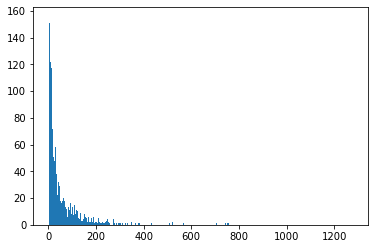

In [24]:
plt.hist(hlen[:5105],bins=1278);

In [25]:
# Removing ids that are not present in our training and test datat
df_hash2 = df_hashed[df_hashed['id']<=5105]

In [26]:
df_hash2.shape

(266053, 2)

In [27]:
df_hash2.feature_50.isnull().any()

True

In [28]:
# Label encoder for hashes

le = LabelEncoder()

imputer = SimpleImputer()

# put mis value as random hash with same len
df_hash2.feature_50 = df_hash2.feature_50.fillna(secrets.token_hex(nbytes=len(df_hash2.feature_50[0])//2)) 

df_hash2['hs'] = le.fit_transform(df_hash2['feature_50'])

In [29]:
df_hash2.head()

,id,feature_50,hs
0,0,7984b0a0e139cabadb5afc7756d473fb34d23819,2367
1,0,47904b3331202e9881d003ff449c2eabfbc75460,1404
2,0,a99c4b3af723874ddd85af322beea81b64437294,3315
3,0,4dce5381031a88aed6b12ef71b6f7c3148e7b3c8,1543
4,0,d62db721202cb6636887f450a7b77fa97db03b05,4180


In [30]:
df_hash2.shape

(266053, 3)

In [31]:
# Dataframe for storing the matrix
df_new_tabular = pd.get_dummies(df_hash2, columns = ['hs']).groupby(['id'],as_index=False).sum()

In [32]:
df_new_tabular.head()

,id,hs_0,hs_1,hs_2,hs_3,hs_4,hs_5,hs_6,hs_7,hs_8,...,hs_5000,hs_5001,hs_5002,hs_5003,hs_5004,hs_5005,hs_5006,hs_5007,hs_5008,hs_5009
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_new_tabular.shape, df_tabular.shape

((5106, 5011), (61272, 52))

### train.csv

In [34]:
df_train_target.shape

(4084, 2)

In [35]:
df_train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      4084 non-null   int64
 1   target  4084 non-null   int64
dtypes: int64(2)
memory usage: 63.9 KB


### test.csv

In [36]:
df_test_target.shape

(1022, 2)

In [37]:
df_test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1022 non-null   int64  
 1   score   0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 16.1 KB


## How good balanced the data

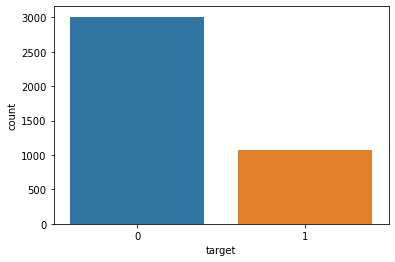

In [3]:
sns.countplot(df_train_target.target, label='Sum')
plt.show()

## Data preparation


In [38]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan, n_neighbors=10)

df_tabular.loc[:, 'feature_0':'feature_49'] = df_tabular.loc[:, 'feature_0':'feature_49'].fillna(np.nan)
df_tabular.loc[:,'feature_0':'feature_49'] = imputer.fit_transform(df_tabular.loc[:,'feature_0':'feature_49'].values)

In [39]:
df_tabular.to_csv('prepared_data/features.csv', index=False)

In [40]:
df_tabular = df_tabular.loc[:,'id':'feature_49'].groupby(['id'],as_index=False).sum()

In [41]:
df_tabular.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,78,1320.0,731.00,2.866555,3523.629746,5161.610,0.000000,5.343986,4141.197,...,5.100,0.0,138.431547,0.0,718.500,9.0,5.985025,1714.0,3780.140,3.000000
1,1,78,1320.0,1626.50,0.725314,83286.958225,13432.230,0.000000,4.207655,14398.120,...,19.640,0.0,40620.522617,1.0,1500.000,81.0,3.588207,1631.0,7832.658,2452.009568
2,2,78,1322.0,7.17,61.905522,1.696433,50.020,0.000000,10.500171,328.119,...,5.480,0.0,0.000987,0.0,7.170,0.0,2.562031,121.0,29.640,0.000000
3,3,78,1325.0,712.33,16.970327,24756.145818,2723.432,15299.328295,18.823161,2623.962,...,17.969,0.0,793.844567,6.1,521.142,69.5,5.636543,1022.4,1866.437,2183.539596
4,4,78,1320.0,1512.00,1.604314,30819.401741,5523.990,0.000000,12.082259,6269.390,...,40.580,0.0,1955.666336,2.0,1244.800,436.0,9.237660,2284.0,3501.819,2506.932045


In [42]:
# Concat dataframes
df_final = pd.merge(df_tabular, 
                   df_new_tabular, 
                   on = 'id')

In [43]:
df_final.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,hs_5000,hs_5001,hs_5002,hs_5003,hs_5004,hs_5005,hs_5006,hs_5007,hs_5008,hs_5009
0,0,78,1320.0,731.00,2.866555,3523.629746,5161.610,0.000000,5.343986,4141.197,...,0,0,0,0,0,0,0,0,0,0
1,1,78,1320.0,1626.50,0.725314,83286.958225,13432.230,0.000000,4.207655,14398.120,...,0,0,0,0,0,0,0,0,0,0
2,2,78,1322.0,7.17,61.905522,1.696433,50.020,0.000000,10.500171,328.119,...,0,0,0,0,0,0,0,0,0,0
3,3,78,1325.0,712.33,16.970327,24756.145818,2723.432,15299.328295,18.823161,2623.962,...,0,0,0,0,0,0,0,0,0,0
4,4,78,1320.0,1512.00,1.604314,30819.401741,5523.990,0.000000,12.082259,6269.390,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_final.to_csv('prepared_data/df_final.csv', index=False)

In [45]:
df_tabular.shape, df_new_tabular.shape, df_final.shape

((5106, 52), (5106, 5011), (5106, 5062))

In [46]:
# Identifying missing IDs. 
s1 = set(df_tabular['id'])
s2 = set(df_new_tabular['id'])
s1.difference(s2)

set()

## Scaling

In [47]:
df_final = pd.read_csv('prepared_data/df_final.csv')

In [48]:
feature_scaler = StandardScaler()
df_final.loc[:, 'feature_0':] = feature_scaler.fit_transform(df_final.loc[:, 'feature_0':])

In [49]:
df_final

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,hs_5000,hs_5001,hs_5002,hs_5003,hs_5004,hs_5005,hs_5006,hs_5007,hs_5008,hs_5009
0,0,78,-0.273723,-0.336434,-0.289625,-0.289912,0.045595,-0.254600,-0.370406,-0.111834,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
1,1,78,-0.273723,0.657418,-0.531011,0.413251,1.574218,-0.254600,-0.499708,2.183229,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
2,2,78,0.243573,-1.139762,6.365947,-0.320960,-0.899158,-0.254600,0.216312,-0.965038,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
3,3,78,1.019516,-0.357155,1.300319,-0.102735,-0.405043,-0.027060,1.163379,-0.451326,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
4,4,78,-0.273723,0.530343,-0.431920,-0.049283,0.112572,-0.254600,0.396337,0.364365,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,5101,78,-0.273723,0.106388,-0.217386,-0.301918,1.793871,-0.237073,-0.342961,2.803330,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,7.779336,-0.057797,-0.095346,-0.028,-0.078156
5102,5102,78,-0.273723,-0.073294,0.409570,-0.320975,-0.430446,-0.254600,0.076587,-0.649703,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
5103,5103,78,0.502220,-0.847155,0.471522,-0.320975,-0.586293,-0.254600,0.183743,-0.866365,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
5104,5104,78,-0.273723,0.000699,-0.519985,-0.216363,-0.747291,-0.254600,-0.229757,-0.840512,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156


In [50]:
df_final.to_csv('prepared_data/df_final_scelled.csv', index=False)

## Split for train, test and choosing features

In [5]:
df_final = pd.read_csv('prepared_data/df_final_scelled.csv')
X = df_final[df_final['id'] <= df_train_target['id'].max()] # Train data without target variable
Test = df_final[df_final['id'] > df_train_target['id'].max()] # Test data for the final submission

In [6]:
# There is one missing id in the test dataset that needs to be inserted on the final stage
Test.shape, df_test_target.shape

((1022, 5062), (1022, 2))

In [7]:
X.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,hs_5000,hs_5001,hs_5002,hs_5003,hs_5004,hs_5005,hs_5006,hs_5007,hs_5008,hs_5009
0,0,78,-0.273723,-0.336434,-0.289625,-0.289912,0.045595,-0.25460,-0.370406,-0.111834,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
1,1,78,-0.273723,0.657418,-0.531011,0.413251,1.574218,-0.25460,-0.499708,2.183229,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
2,2,78,0.243573,-1.139762,6.365947,-0.320960,-0.899158,-0.25460,0.216312,-0.965038,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
3,3,78,1.019516,-0.357155,1.300319,-0.102735,-0.405043,-0.02706,1.163379,-0.451326,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
4,4,78,-0.273723,0.530343,-0.431920,-0.049283,0.112572,-0.25460,0.396337,0.364365,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156


In [8]:
Xy = pd.merge(df_train_target, 
              X, 
              on = 'id')

In [9]:
Xy.head()

,id,target,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,hs_5000,hs_5001,hs_5002,hs_5003,hs_5004,hs_5005,hs_5006,hs_5007,hs_5008,hs_5009
0,0,0,78,-0.273723,-0.336434,-0.289625,-0.289912,0.045595,-0.25460,-0.370406,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
1,1,0,78,-0.273723,0.657418,-0.531011,0.413251,1.574218,-0.25460,-0.499708,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
2,2,1,78,0.243573,-1.139762,6.365947,-0.320960,-0.899158,-0.25460,0.216312,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
3,3,0,78,1.019516,-0.357155,1.300319,-0.102735,-0.405043,-0.02706,1.163379,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156
4,4,1,78,-0.273723,0.530343,-0.431920,-0.049283,0.112572,-0.25460,0.396337,...,-0.057797,-0.057797,-0.028,-0.013996,-0.091071,-0.128546,-0.057797,-0.095346,-0.028,-0.078156


In [10]:
X.shape, Xy.shape

((4084, 5062), (4084, 5063))

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/mlens/visualization/correlations.py:303: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax2.set_xticks([], [])


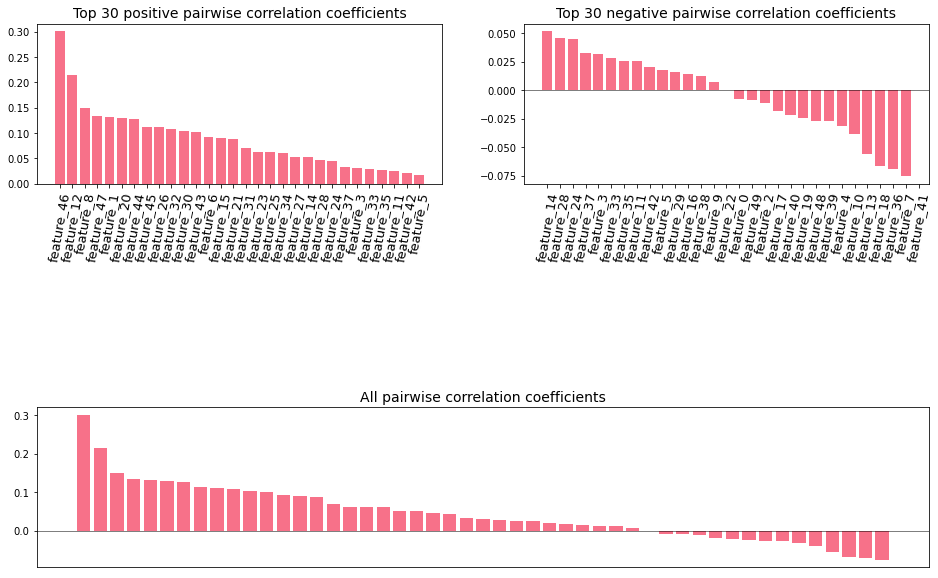

GridSpec(2, 2)

In [27]:
from mlens.visualization import corr_X_y, corrmat
corr_X_y(Xy.loc[:,'feature_0':'feature_49'], Xy['target'], figsize=(16,10), label_rotation=80, hspace=1, fontsize=14,top=30)

In [28]:
best_features_15 = ['feature_46', 'feature_12', 'feature_8','feature_47', 'feature_1', 'feature_20',
                'feature_44', 'feature_45', 'feature_26','feature_32', 'feature_30', 'feature_43',
                'feature_6', 'feature_15', 'feature_21']

best_features_20 = best_features_15 + ['feature_31', 'feature_23', 'feature_25','feature_34', 'feature_27'] 
best_features_25 = best_features_20 + ['feature_14', 'feature_28', 'feature_24','feature_37', 'feature_3'] 
best_features_30 = best_features_25 + ['feature_33','feature_35','feature_11','feature_42','feature_5']

## Correlated matrix with 15  best features

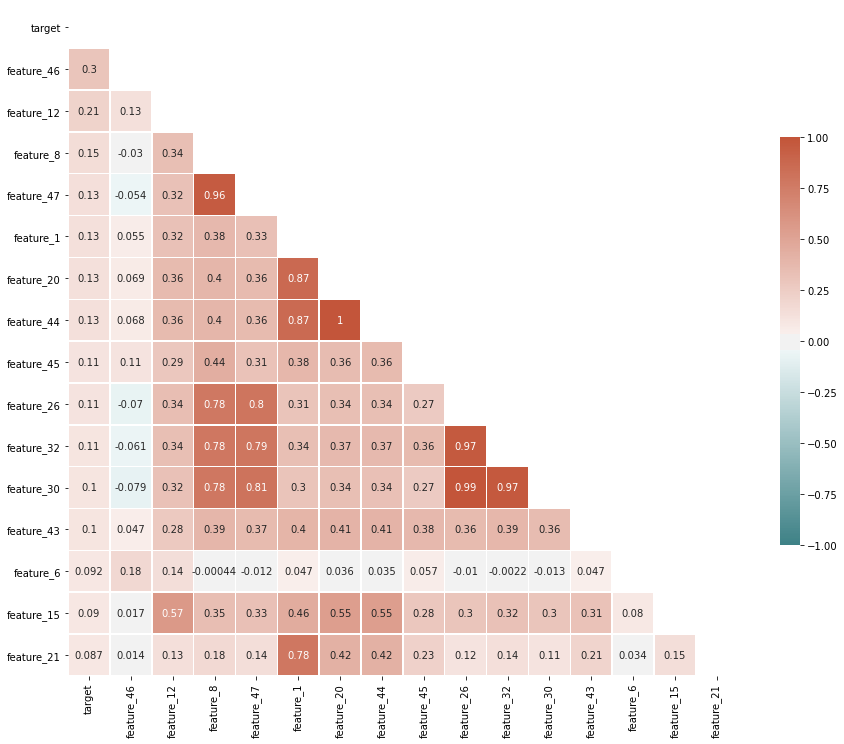

In [26]:
correlation = Xy[['target']+best_features].corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5,cbar_kws={'shrink': .5}, annot=True)

## Corelation matrix with all features

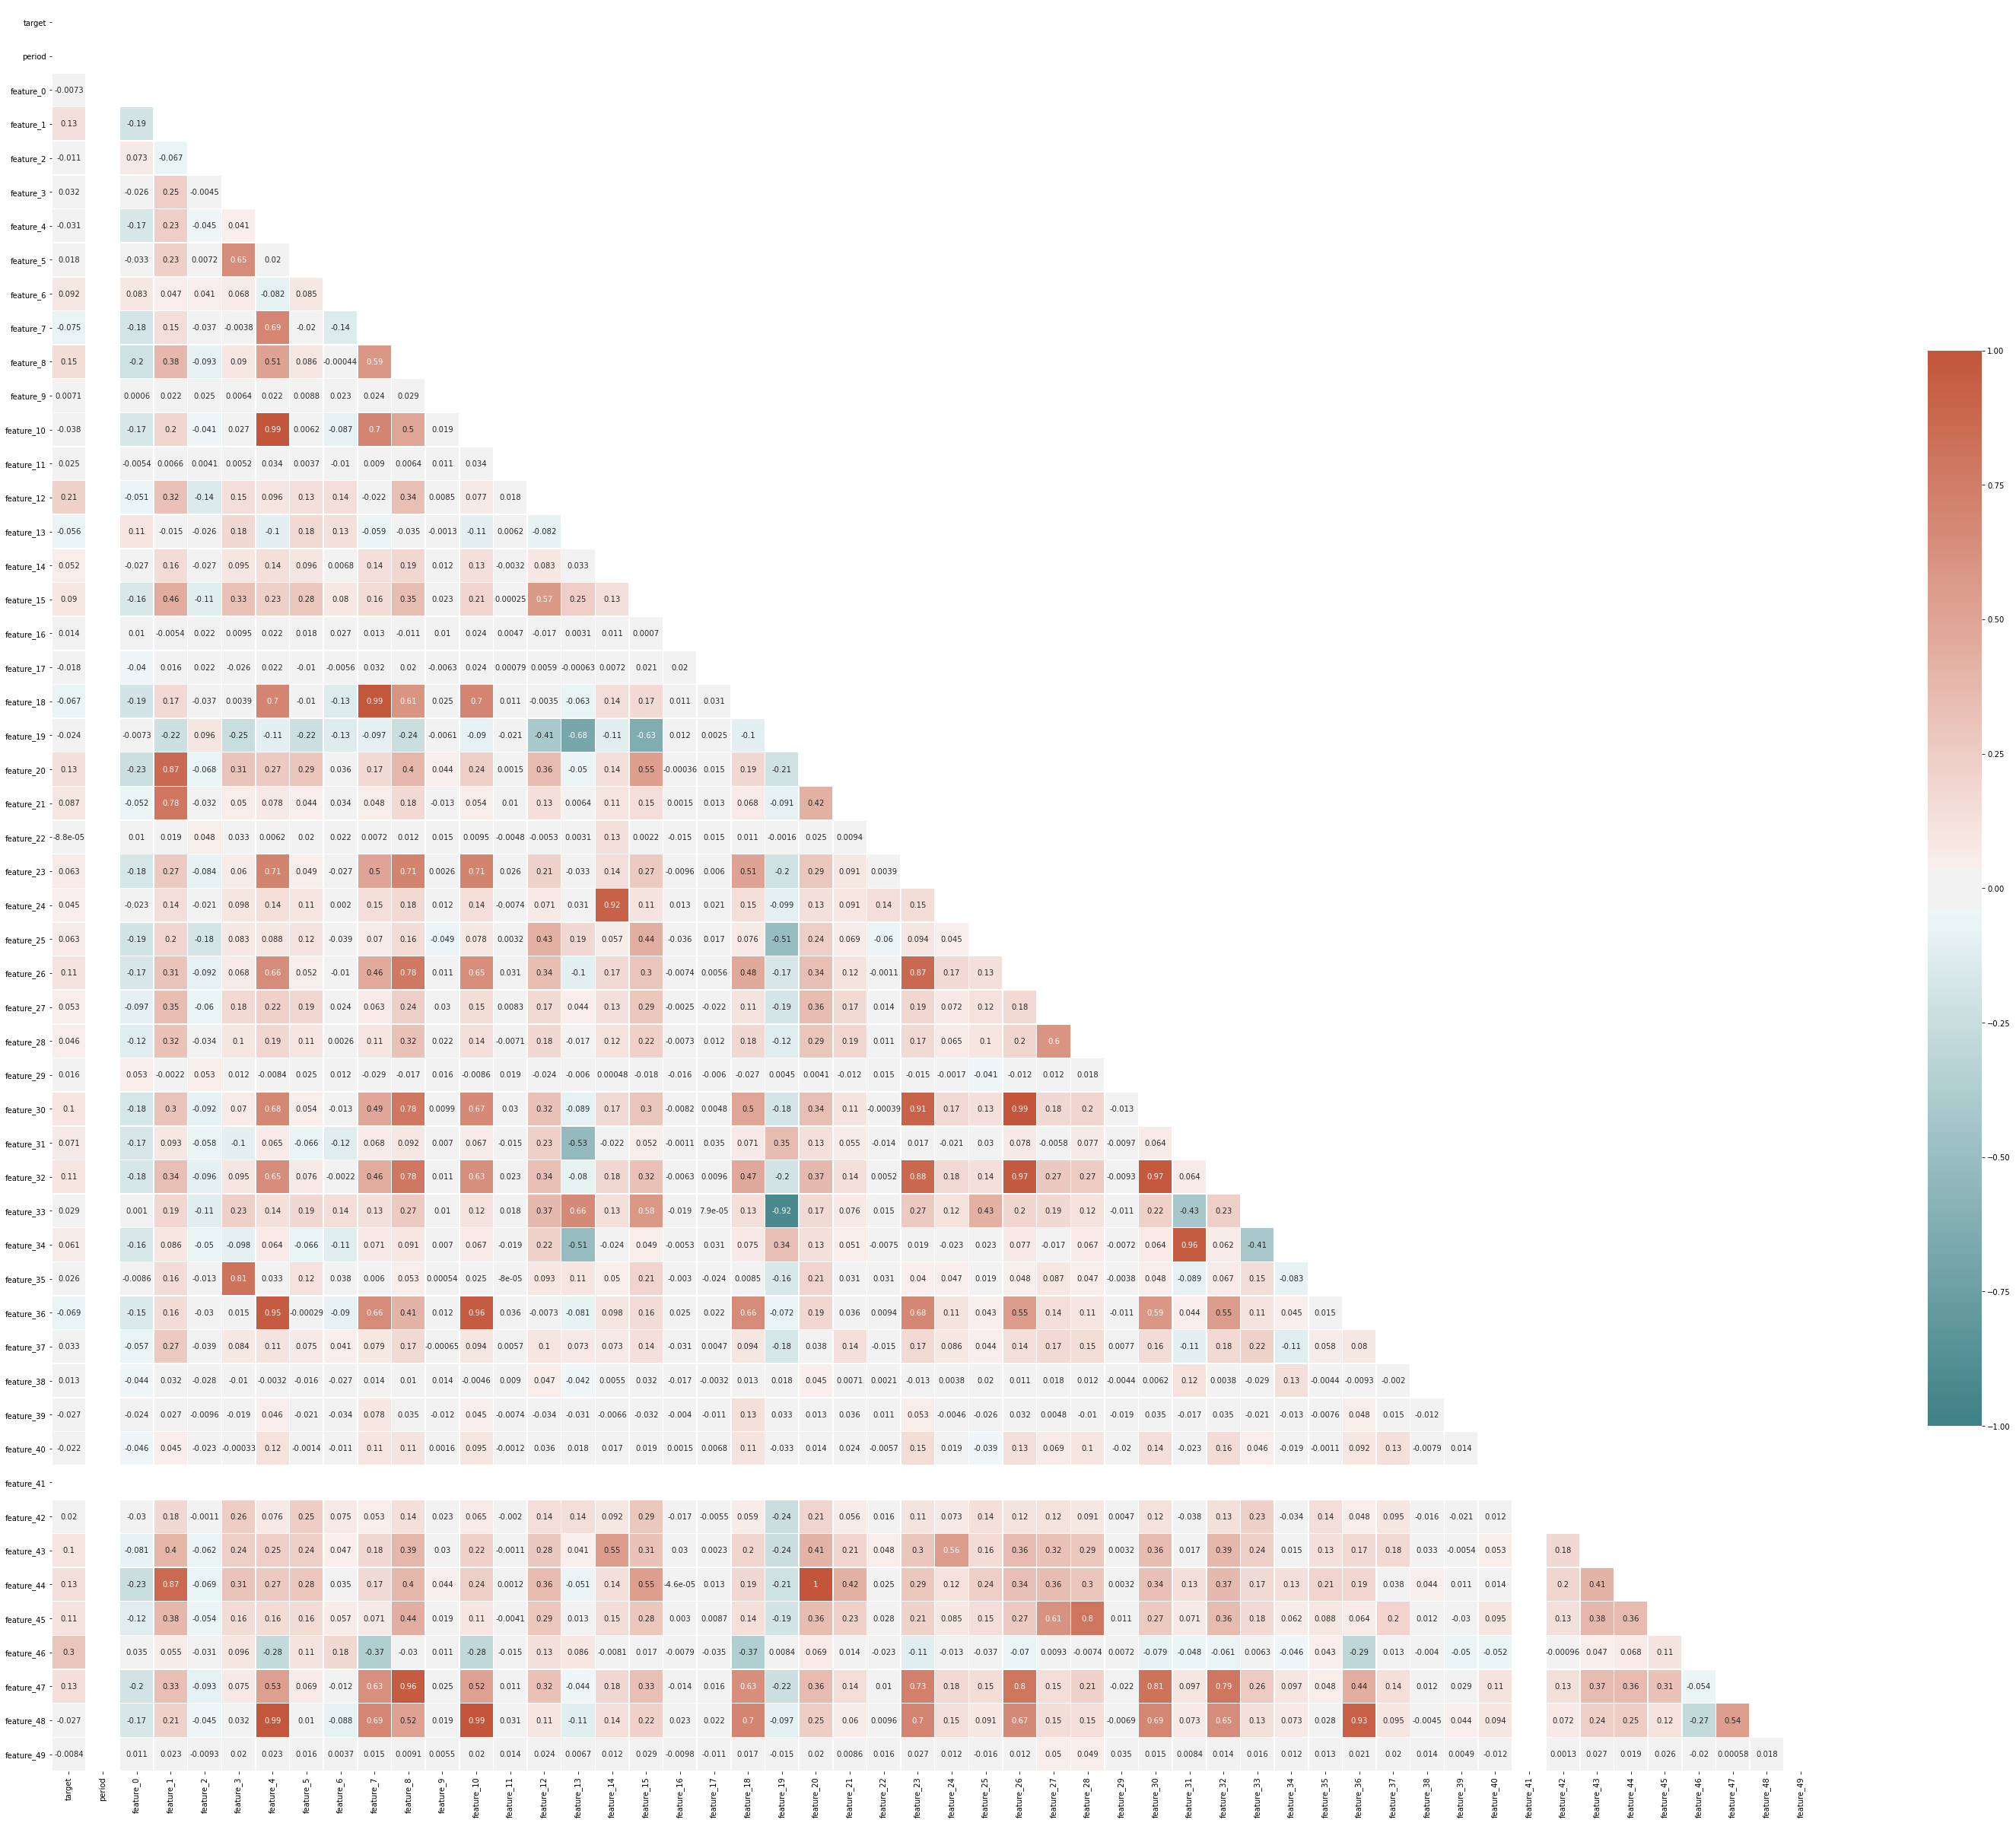

In [98]:
correlation = Xy.loc[:,'target':'feature_49'].corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(52, 52))

cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5,cbar_kws={'shrink': .5}, annot=True)

plt.savefig('correlation.jpg')
plt.show()

Chose features which |correlation with 'target'|  > 0.05

In [29]:
Xy_feature_15 = Xy[['id', 'target'] + best_features_15]
test_feature_15 = Test[['id'] + best_features_15]

Xy_feature_20 = Xy[['id', 'target'] + best_features_20]
test_feature_20 = Test[['id'] + best_features_20]

Xy_feature_25 = Xy[['id', 'target'] + best_features_25]
test_feature_25 = Test[['id'] + best_features_25]

Xy_feature_30 = Xy[['id', 'target'] + best_features_30]
test_feature_30 = Test[['id'] + best_features_30]

In [30]:
test_feature_15.to_csv('prepared_data/test_best_features_15.csv', index=False)
Xy_feature_15.to_csv('prepared_data/train_best_features_15.csv', index=False)

test_feature_20.to_csv('prepared_data/test_best_features_20.csv', index=False)
Xy_feature_20.to_csv('prepared_data/train_best_features_20.csv', index=False)

test_feature_25.to_csv('prepared_data/test_best_features_25.csv', index=False)
Xy_feature_25.to_csv('prepared_data/train_best_features_25.csv', index=False)

test_feature_30.to_csv('prepared_data/test_best_features_30.csv', index=False)
Xy_feature_30.to_csv('prepared_data/train_best_features_30.csv', index=False)

# Training model for 15 best featrues

### Spliting the data 

In [4]:
test_features_15 = pd.read_csv('prepared_data/test_best_features_15.csv')
Xy_features_15 = pd.read_csv('prepared_data/train_best_features_15.csv')

y = Xy_features_15['target']
X = Xy_features_15.drop(['target'], axis = 1)

# Spliting set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [15]:
print(f'train_shape:\t{X_train.shape}')
print(f'test_shape:\t{X_test.shape}')

train_shape:	(3267, 16)
test_shape:	(817, 16)


### Choosing the best model

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, \
                            roc_auc_score , accuracy_score, precision_score, auc, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

In [6]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecTree', DecisionTreeClassifier())) 
models.append(('RF', RandomForestClassifier())) 
models.append(('XGB', XGBClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('ada', AdaBoostClassifier()))
models.append(('SVC', SVC()))

In [7]:
mod_list = []
for mod , _ in models:
    mod_list.append(mod)

mod_list.append('Cleaning')

df_boxplot = pd.DataFrame(columns=['Score', 'ML'])

In [8]:
def get_score_for_model(n_splits=10):
    seed = 13

    results = []
    names = []
    scoring = 'roc_auc'

    for name, model in models:
        strat = StratifiedKFold(n_splits=n_splits, random_state=seed, shuffle=True)

        cv_results = cross_val_score(model, X_train, y_train, cv=strat, scoring=scoring, n_jobs=-1)

        results.append(cv_results)
        names.append(name)

        print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
        
    return results

In [9]:
results = get_score_for_model()

LR: 0.7248445372058487 (0.03279382979936665)
KNN: 0.5360121313043872 (0.019918084318611987)
DecTree: 0.5597170704301709 (0.030258747625583508)
RF: 0.7050047983805738 (0.03615332430288172)
XGB: 0.6770076795949687 (0.03654494036743031)
GaussianNB: 0.6486005442901093 (0.020544663079261786)
ada: 0.7061810747425198 (0.022397719659350144)
SVC: 0.5374585288026711 (0.03634538790913056)


In [10]:
def append_res_to_boxplot(results, df):
    i = 0
    while i < len(results[0]):
        line = []
        for num, ml in zip(results, mod_list): 
            line.append([num[i],ml])

        i = i+1
        df = df.append(pd.DataFrame(line, columns=['Score', 'ML']),ignore_index=True)
    return df

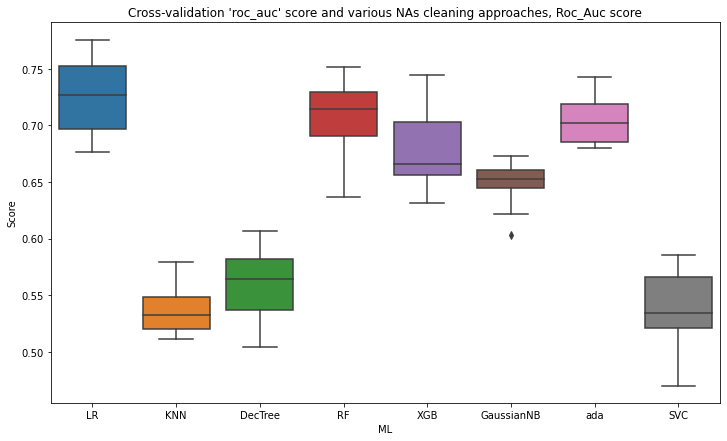

In [11]:
df_boxplot = append_res_to_boxplot(results, df_boxplot)

# Plotting the results 
plt.figure(figsize=(12,7))
plt.title("Cross-validation 'roc_auc' score and various NAs cleaning approaches, Roc_Auc score")
sns.boxplot(data = df_boxplot, x = 'ML',y='Score');

## Fitting the best models : LogReg, RandomForest, ADA

In [ ]:
randomForest = LogisticRegression()

grid1 = { 
    'n_estimators': [3,4,5,6,7,8,9,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy', 'auc']
}

scoring = 'roc_auc'
clf1 = GridSearchCV(randomForest, grid2, n_jobs=-1, 
                   cv=StratifiedKFold(n_splits=10, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf1.fit(X_train, y_train)

### Random Forest fitting

In [17]:
randomForest = RandomForestClassifier()

grid2 = { 
    'n_estimators': [3,4,5,6,7,8,9,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy', 'auc']
}

scoring = 'roc_auc'
clf2 = GridSearchCV(randomForest, grid2, n_jobs=-1, 
                   cv=StratifiedKFold(n_splits=10, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf2.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 324 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 2268 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   17.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'auc'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc', verbose=2)

In [18]:
print(f'best_parametrs:\n{clf2.best_params_}')

bast_parametrs
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 6}


In [37]:
pred_test = clf2.predict(X_test)
pred_train = clf2.predict(X_train)
auc_train = roc_auc_score(y_train, pred_train)
auc_test = roc_auc_score(y_test, pred_test)
name = 'RandomForest_15'

metric_train = pd.DataFrame({'name': [name + '_train'],
                'accuracy' : [accuracy_score(y_train.values, pred_train)], 
              'auc': [auc_train],
              'gini': [2*auc_train - 1],
              'precision': [precision_score(y_train, pred_train)],
              'recall': [recall_score(y_train, pred_train)],

             })
metric_test = pd.DataFrame({'name': [name + '_test'],
                            'accuracy' : [accuracy_score(y_test, pred_test)], 
                          'auc': [auc_test],
                          'gini': [2*auc_test - 1],
                          'precision': [precision_score(y_test, pred_test)],
                          'recall': [recall_score(y_test, pred_test)]
            })

In [38]:
metric_train

,name,accuracy,auc,gini,precision,recall
0,RandomForest_15_train,0.764616,0.584762,0.169524,0.717842,0.197941


In [39]:
metric_test

,name,accuracy,auc,gini,precision,recall
0,RandomForest_15_test,0.779682,0.590784,0.181568,0.656716,0.218905


In [35]:
confusion_matrix(y_train, pred_train)

array([[2325,   68],
       [ 701,  173]])

In [36]:
confusion_matrix(y_test, pred_test)

array([[593,  23],
       [157,  44]])